In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load the dataset (replace 'NSW_fire_history_polygons.csv' with your actual file path)
df = pd.read_csv('NSW_fire_history_polygons.csv')

# Overview of the dataset
print(df.head())
print(df.info())
print(df.describe())

   FID FireName  FireNo                    Label               StartDate  \
0    1                   1968-69 Prescribed Burn  1968/10/01 00:00:00+00   
1    2                   1970-71 Prescribed Burn  1970/01/01 00:00:00+00   
2    3           70/161  1970-71 Prescribed Burn  1970/01/01 00:00:00+00   
3    4           70/161  1970-71 Prescribed Burn  1970/01/01 00:00:00+00   
4    5           70/160  1970-71 Prescribed Burn  1970/01/01 00:00:00+00   

                  EndDate      AreaHa    PerimeterM    Verdate  \
0  1970/01/01 00:00:00+00    2.184770   1548.960666  26/3/2020   
1  1970/01/01 00:00:00+00  299.985464   8615.637120  26/3/2020   
2  1970/01/01 00:00:00+00  309.025645  20657.633990  26/3/2020   
3  1970/01/01 00:00:00+00  316.104427  20353.231750  26/3/2020   
4  1970/01/01 00:00:00+00   28.484088   2695.160793  26/3/2020   

              Type   Season  ID  Year                Year_Con   Shape__Area  \
0  Prescribed Burn  1968-69   0  1968  1968/01/01 00:00:00+00  2.18

In [3]:
# Convert 'StartDate' column to a datetime object
df['StartDate'] = pd.to_datetime(df['StartDate'])

# Extract month and year from the 'StartDate' column
df['Month'] = df['StartDate'].dt.month
df['Year'] = df['StartDate'].dt.year

# Group by year and month, and count the number of fires
fire_frequency = df.groupby(['Year', 'Month']).size().reset_index(name='FireFrequency')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33804 entries, 0 to 33803
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   FID            33804 non-null  int64              
 1   FireName       33803 non-null  object             
 2   FireNo         33792 non-null  object             
 3   Label          33804 non-null  object             
 4   StartDate      33804 non-null  datetime64[ns, UTC]
 5   EndDate        33804 non-null  object             
 6   AreaHa         33804 non-null  float64            
 7   PerimeterM     33804 non-null  float64            
 8   Verdate        33804 non-null  object             
 9   Type           33804 non-null  object             
 10  Season         33804 non-null  object             
 11  ID             33804 non-null  int64              
 12  Year           33804 non-null  int64              
 13  Year_Con       33804 non-null  object         

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('NSW_fire_history_polygons.csv')

# Extract the month from the "StartDate" column
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['Month'] = df['StartDate'].dt.month

# Define your features and target variable
X = df[['AreaHa', 'Month']]  # Features
y = df['PerimeterM']  # Target variable

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 598435323.4054276


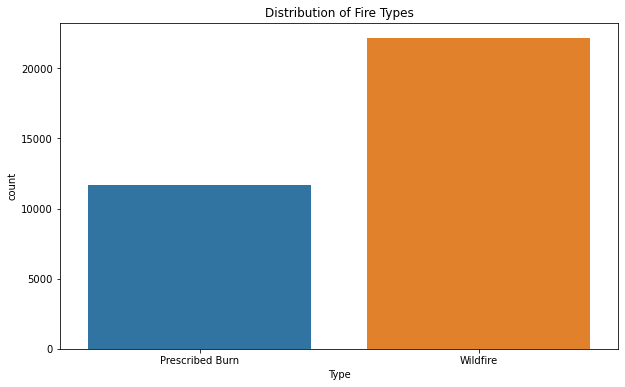

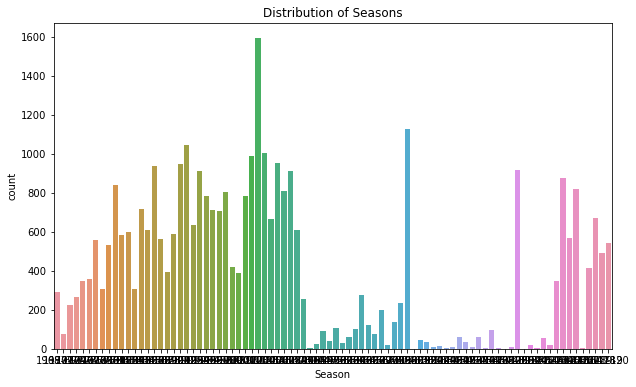

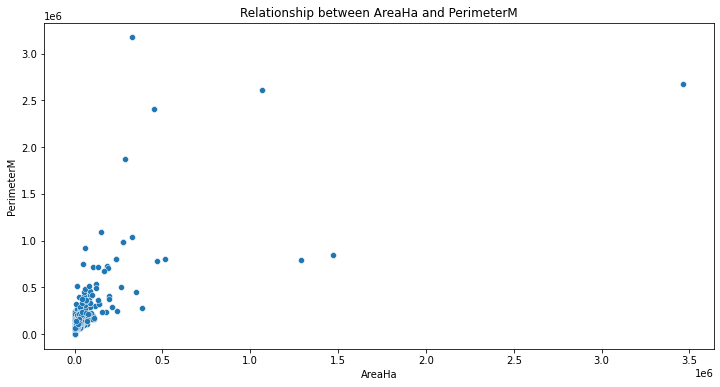

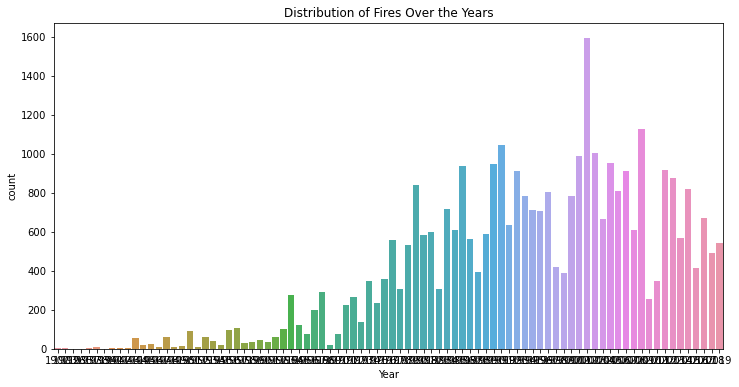

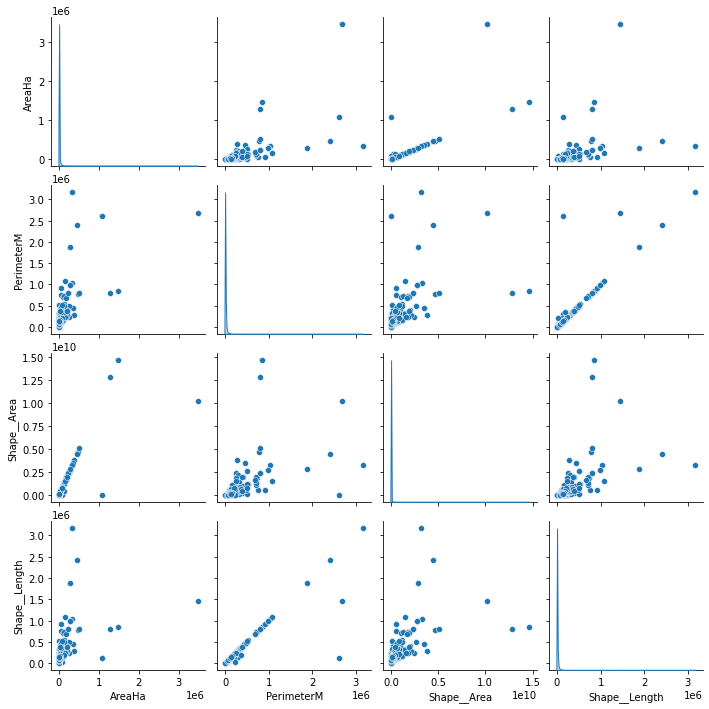

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numeric columns
numeric_summary = df.describe()

# Distribution of fire types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type')
plt.title('Distribution of Fire Types')

# Distribution of seasons
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season')
plt.title('Distribution of Seasons')

# Relationship between area and perimeter
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AreaHa', y='PerimeterM', data=df)
plt.title('Relationship between AreaHa and PerimeterM')
plt.xlabel('AreaHa')
plt.ylabel('PerimeterM')

# Distribution of fires over the years
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year')
plt.title('Distribution of Fires Over the Years')

# Pairplot for numeric variables
sns.pairplot(data=df, vars=['AreaHa', 'PerimeterM', 'Shape__Area', 'Shape__Length'], diag_kind='kde')

plt.show()

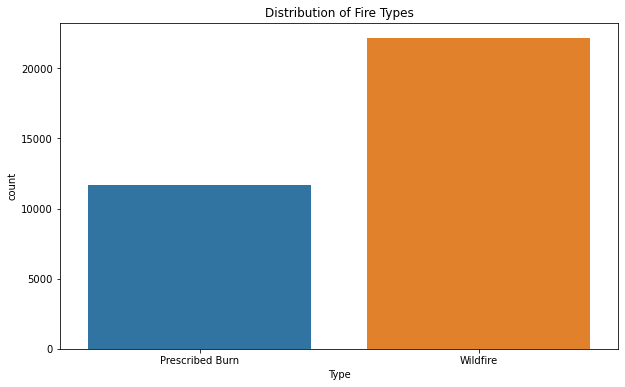

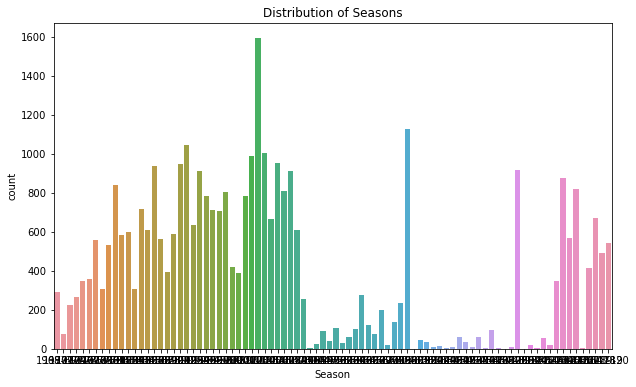

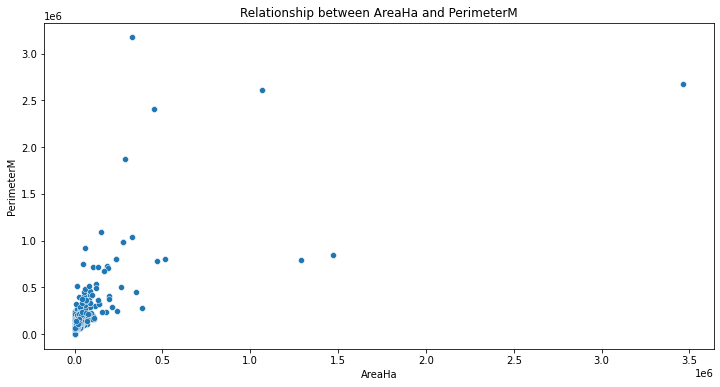

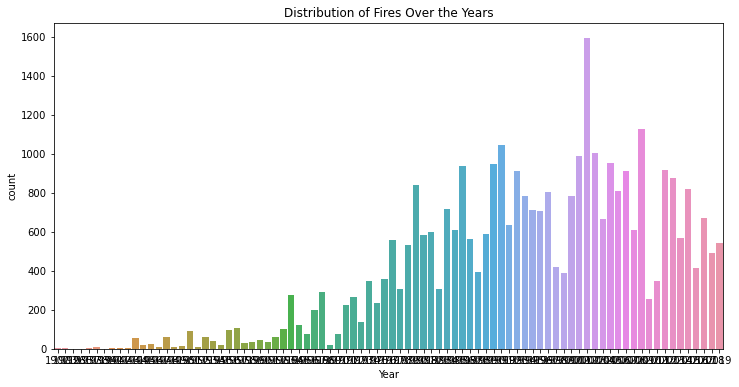

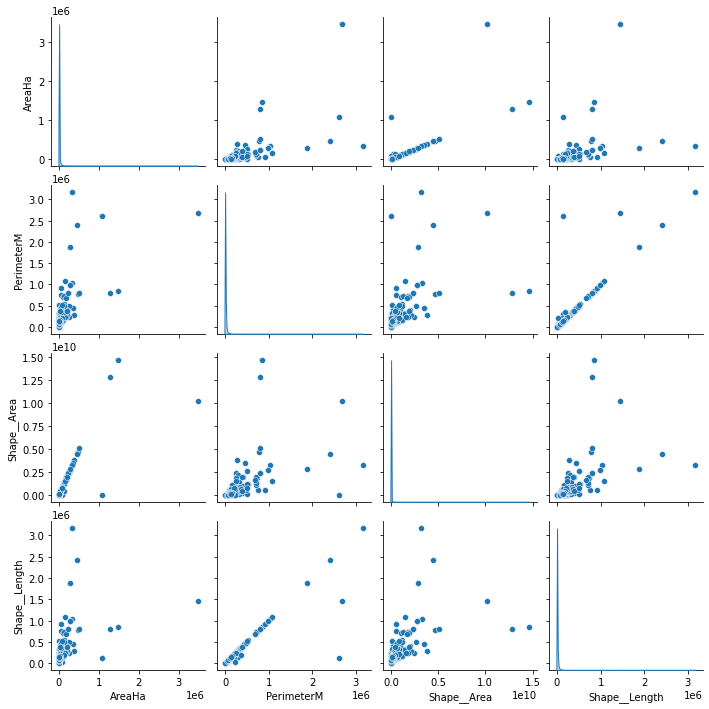

In [7]:
# Summary statistics for numeric columns
numeric_summary = df.describe()

# Distribution of fire types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type')
plt.title('Distribution of Fire Types')

# Distribution of seasons
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season')
plt.title('Distribution of Seasons')

# Relationship between area and perimeter
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AreaHa', y='PerimeterM', data=df)
plt.title('Relationship between AreaHa and PerimeterM')
plt.xlabel('AreaHa')
plt.ylabel('PerimeterM')

# Distribution of fires over the years
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year')
plt.title('Distribution of Fires Over the Years')

# Pairplot for numeric variables
sns.pairplot(data=df, vars=['AreaHa', 'PerimeterM', 'Shape__Area', 'Shape__Length'], diag_kind='kde')

# Preparing the data for machine learning
# Assuming you've selected 'AreaHa' as your target variable and encoded categorical features as shown earlier
from sklearn.model_selection import train_test_split

# Define the target variable
target = 'AreaHa'
X = df.drop(columns=[target])
y = df[target]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# At this point, you can use the training data (X_train, y_train) to train your machine learning model.

In [8]:
# One-hot encoding for 'Type' and 'Season' columns
df = pd.get_dummies(df, columns=['Type', 'Season'], drop_first=True)

# Extract features from 'StartDate'
df['Year_Start'] = df['StartDate'].dt.year
df['Month_Start'] = df['StartDate'].dt.month
df['Day_Start'] = df['StartDate'].dt.day
df['DayOfWeek_Start'] = df['StartDate'].dt.dayofweek  # Monday: 0, Sunday: 6

# Drop original columns that are no longer needed
df = df.drop(['StartDate', 'FireName', 'FireNo', 'Label', 'EndDate', 'Verdate', 'Year_Con'], axis=1)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'AreaHa' is your target variable
X = df.drop('AreaHa', axis=1)  # Features
y = df['AreaHa']  # Target variable

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error: 35477273.04
Root Mean Squared Error: 5956.28
R-squared (R2): 0.88


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Metrics:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")


Random Forest Model Metrics:
Mean Squared Error: 24326148.33
Root Mean Squared Error: 4932.15
R-squared (R2): 0.92


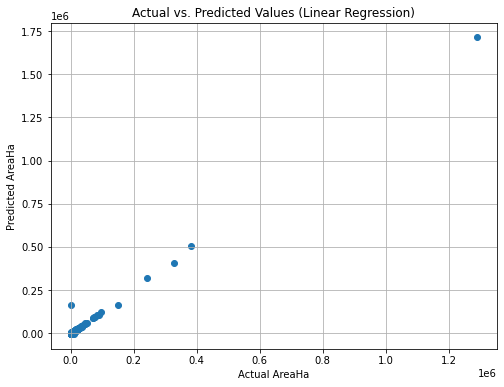

Linear Regression Metrics:
Mean Squared Error: 35477273.04
Root Mean Squared Error: 5956.28
R-squared (R2): 0.88


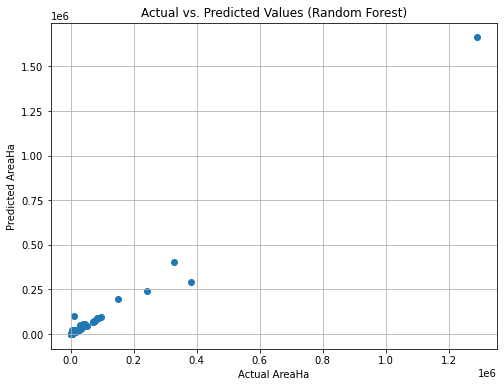

Random Forest Metrics:
Mean Squared Error: 24326148.33
Root Mean Squared Error: 4932.15
R-squared (R2): 0.92


In [11]:
X = df.drop('AreaHa', axis=1)  # Features
y = df['AreaHa']  

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions with the Linear Regression model
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Create a scatter plot of actual vs. predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual AreaHa")
plt.ylabel("Predicted AreaHa")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.grid(True)
plt.show()

print(f"Linear Regression Metrics:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Root Mean Squared Error: {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Create a scatter plot of actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual AreaHa")
plt.ylabel("Predicted AreaHa")
plt.title("Actual vs. Predicted Values (Random Forest)")
plt.grid(True)
plt.show()

print("Random Forest Metrics:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")
